In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
data_train = pd.read_csv("Datasets/titanic_train.csv")
data_train.head()

In [ ]:
data_test = pd.read_csv("Datasets/titanic_test.csv")
data_test.head()

In [ ]:
data_train["Sex"].replace(["female","male"],[0,1],inplace=True)
data_train.fillna(29.70,inplace=True)
data_train.head()


In [ ]:
data_test["Sex"].replace(["female","male"],[0,1],inplace=True)
data_test.fillna(29.70,inplace=True)
data_test.head()

In [ ]:
data_test_target = pd.read_csv("Datasets/titanic_gender_submission.csv")
data_test_target.head()

In [40]:
X_train = data_train[["Pclass","Sex","Age"]].values
Y_train = data_train[["Survived"]].values

X_test = data_test[["Pclass","Sex","Age"]].values
Y_test = data_test_target[["Survived"]].values

## KNN (K-Nearest-Neighbors)

In [102]:
model_KNN = KNN(5)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)
accuracy_KNN = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_KNN)


Accuracy: 0.8397129186602871


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Perceptron

In [100]:
model_perceptron = Perceptron()
model_perceptron.fit(X_train, Y_train)
Y_Pred = model_perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_perceptron)

Accuracy: 0.861244019138756


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## MLP (Multi Layer Perceptron)

In [87]:
model_MLP = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3,activation="sigmoid"), # input
    tf.keras.layers.Dense(24,activation="relu"), # hidden1
    tf.keras.layers.Dense(6,activation="sigmoid"), # hidden 2
    tf.keras.layers.Dense(2,activation="softmax"), # output
])

model_MLP.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=["accuracy"])

In [ ]:
output_MLP =  model_MLP.fit(X_train,Y_train,epochs=65)

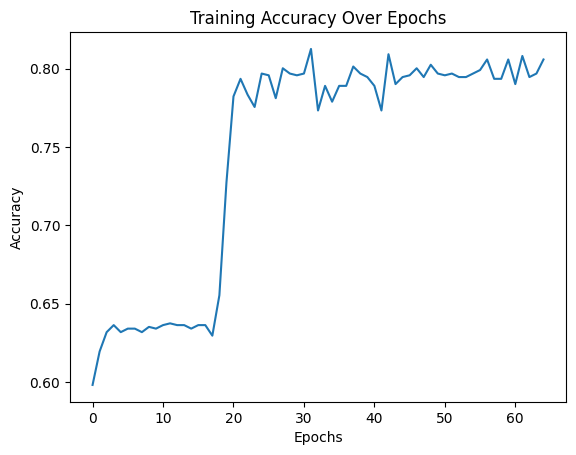

In [90]:
plt.plot(output_MLP.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.show()

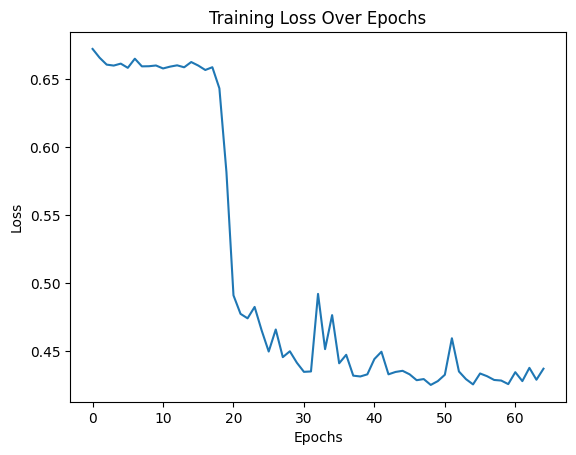

In [91]:
plt.plot(output_MLP.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()

In [94]:
Y_pred = model_MLP.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [92]:
model_MLP.evaluate(X_test,Y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8079 - loss: 0.3028  


[0.29158997535705566, 0.8277512192726135]

In [98]:
msk = np.where(Y_pred[:, 0] > Y_pred[:, 1], 0, 1)
precision = precision_score(Y_test, msk)
recall = recall_score(Y_test, msk)

print("Precision: ",precision)
print("Recall:", recall)


Precision:  0.9347826086956522
Recall: 0.5657894736842105


|Algorithm|Accuracy|
|---------|--------|
|KNN|0.8397|
|Perceptron|0.8612|
|MLP (Multi Layer Perceptron)|0.8277|
